In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os
import astropy as asp
import pickle
import tqdm

In [4]:
import os

root_dir = "/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28"

found_numbers = set()

for entry in os.listdir(root_dir):
    full_path = os.path.join(root_dir, entry)
    if os.path.isdir(full_path):
        try:
            number = int(entry.rsplit("_", 1)[-1])
            found_numbers.add(number)
        except ValueError:
            # folder doesn't end with a number → ignore
            pass

expected_numbers = set(range(0, 1001))
missing_numbers = sorted(expected_numbers - found_numbers)

print("Missing numbers:")
print(missing_numbers)

Missing numbers:
[0]


In [5]:
import os

root_dir = "/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28"

dirs_with_fewer_than_3_files = []

for entry in os.listdir(root_dir):
    full_path = os.path.join(root_dir, entry)
    if os.path.isdir(full_path):
        files = [
            f for f in os.listdir(full_path)
            if os.path.isfile(os.path.join(full_path, f))
        ]
        if len(files) < 4:
            dirs_with_fewer_than_3_files.append((full_path, len(files)))

for d, count in dirs_with_fewer_than_3_files:
    print(f"{d} has {count} files")

/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28/run_20260204T0435_392 has 2 files
/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28/run_20260204T0704_836 has 2 files
/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28/run_20260204T0554_619 has 3 files
/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28/run_20260204T0519_487 has 3 files
/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28/run_20260204T0521_529 has 3 files
/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28/run_20260204T0633_675 has 3 files
/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28/run_20260204T0725_784 has 2 files
/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_vdiff_1_28/run_20260204T0614_

In [2]:
COLUMNS = [
    'deblend_nChild',
    'id', 
    'coord_ra', 
    'coord_dec', 
    'base_SdssCentroid_x',
    'base_SdssCentroid_y',
    'base_SdssCentroid_flag',
    'base_SdssShape_xx', 
    'base_SdssShape_yy', 
    'base_SdssShape_xy',
    'base_SdssShape_psf_xx', 
    'base_SdssShape_psf_yy',
    'base_SdssShape_psf_xy',
    'base_SdssShape_flag',
    'modelfit_DoubleShapeletPsfApprox_flag',
    'base_PsfFlux_instFlux',
    'base_PsfFlux_instFluxErr',
    'base_PsfFlux_flag',
    'modelfit_CModel_instFlux', 
    'modelfit_CModel_instFluxErr',
    'modelfit_CModel_flag',
    'ext_gaap_GaapFlux_1_15x_Optimal_instFlux',
    'ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr',
    'ext_gaap_GaapFlux_flag',
    'base_CircularApertureFlux_4_5_instFlux',
    'base_CircularApertureFlux_4_5_instFluxErr',
    'base_CircularApertureFlux_9_0_instFlux',
    'base_CircularApertureFlux_9_0_instFluxErr',
    'base_CircularApertureFlux_25_0_instFlux',
    'base_CircularApertureFlux_25_0_instFluxErr',
    'base_ClassificationSizeExtendedness_flag',
]

In [20]:
folder = 'vdiff_1_28'

In [23]:
bands = 'ugrizy'
base = f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_{folder}/'
cats_by_band = {b: [] for b in bands}
i = 0
for entry in os.scandir(base):
    if not entry.is_dir():
        continue
    pkl = os.path.join(entry.path, 'ECDFS_sim_meas_forced.pkl')
    if not os.path.exists(pkl):
        continue
    try:
        with open(pkl, 'rb') as f:
            cat = pickle.load(f)
        if i % 100 == 0:
            print(i)
            pass
        for b in bands:
            temp = cat[b][COLUMNS]
            temp['obs_ind'] = i
            # temp = temp[(temp['deblend_nChild'] == 0) &
            #   (temp['base_SdssShape_flag'] == False) &
            #   (temp['modelfit_CModel_instFlux'] >= 0) &
            #   (temp['modelfit_CModel_flag'] == False) &
            #   (temp['ext_gaap_GaapFlux_1_15x_Optimal_instFlux'] >= 0) &
            #   (temp['base_SdssCentroid_flag'] == False) &
            #   (temp['ext_gaap_GaapFlux_flag'] == False) &
            #   (temp['base_ClassificationSizeExtendedness_flag'] == False)]
            # temp = temp[(temp['base_PsfFlux_instFlux']/temp['base_PsfFlux_instFluxErr'] >= 10)]
            cats_by_band[b].append(temp)
        i += 1
    except (OSError, pickle.PickleError) as e:
        continue
print(i)
full_cats = {
    b: asp.table.vstack(cats_by_band[b])
    for b in bands
}

0
100
200
300
400
500
600
700
800
900
994


In [24]:
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/forced_cat_{folder}.pkl', "wb") as f:
    pickle.dump(full_cats, f)

In [26]:
bands = 'ugrizy'
base = f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_{folder}/'
cats_by_band = {b: [] for b in bands}
i = 0
for entry in os.scandir(base):
    if not entry.is_dir():
        continue
    pkl = os.path.join(entry.path, 'ECDFS_sim_meas_forced_s.pkl')
    if not os.path.exists(pkl):
        continue
    try:
        with open(pkl, 'rb') as f:
            cat = pickle.load(f)
        if i % 100 == 0:
            print(i)
            pass
        for b in bands:
            temp = cat[b][COLUMNS]
            temp['obs_ind'] = i
            # temp = temp[(temp['deblend_nChild'] == 0) &
            #   (temp['base_SdssShape_flag'] == False) &
            #   (temp['modelfit_CModel_instFlux'] >= 0) &
            #   (temp['modelfit_CModel_flag'] == False) &
            #   (temp['ext_gaap_GaapFlux_1_15x_Optimal_instFlux'] >= 0) &
            #   (temp['base_SdssCentroid_flag'] == False) &
            #   (temp['ext_gaap_GaapFlux_flag'] == False) &
            #   (temp['base_ClassificationSizeExtendedness_flag'] == False)]
            # temp = temp[(temp['base_PsfFlux_instFlux']/temp['base_PsfFlux_instFluxErr'] >= 10)]
            cats_by_band[b].append(temp)
        i += 1
    except (OSError, pickle.PickleError) as e:
        continue
print(i)
full_cats_force = {
    b: asp.table.vstack(cats_by_band[b])
    for b in bands
}

0
100
200
300
400
500
600
700
800
900
982


In [27]:
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/forced_s_cat_{folder}.pkl', "wb") as f:
    pickle.dump(full_cats_force, f)

In [32]:
bands = 'ugrizy'
base = f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_{folder}/'
cats_by_band = {b: [] for b in bands}
i_true = 0
for entry in os.scandir(base):
    if not entry.is_dir():
        continue
    pkl = os.path.join(entry.path, 'ECDFS_sim_truth.pkl')
    if not os.path.exists(pkl):
        continue
    try:
        with open(pkl, 'rb') as f:
            cat = pickle.load(f)
        if i_true % 100 == 0:
            print(i_true)
        for b in bands:
            cat[b]['obs_ind'] = i_true
            cats_by_band[b].append(cat[b])
        i_true += 1
    except (OSError, pickle.PickleError) as e:
        continue
print(i_true)
true_cats = {
    b: asp.table.vstack(cats_by_band[b])
    for b in bands
}


0
100
200
300
400
500
600
700
800
900
1000


In [33]:
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/true_cat_{folder}.pkl', "wb") as f:
    pickle.dump(true_cats, f)

In [ ]:
# with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/full_cat_v6.pkl', "rb") as f:
#     full_cats = pickle.load(f)
# with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/true_cat_v6.pkl', "rb") as f:
#     true_cats = pickle.load(f)
# with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/full_cat_vdiffnew.pkl', "rb") as f:
#     full_cats_n = pickle.load(f)
# with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/true_cat_vdiffnew.pkl', "rb") as f:
#     true_cats_n = pickle.load(f)

In [35]:
area = (max(full_cats[b]['obs_ind']) + 1) * (900 * 0.2/60) **2
t_area = (max(true_cats[b]['obs_ind']) + 1) * (900 * 0.2/60) **2
s_area = (max(full_cats_force[b]['obs_ind']) + 1) * (900 * 0.2/60) **2

In [40]:
def get_stellar_locust(b, cat):
    temp = cat[b]
    temp = temp[(temp['deblend_nChild'] == 0) &
        (temp['base_SdssShape_flag'] == False) &
        (temp['modelfit_CModel_instFlux'] >= 0) &
        (temp['modelfit_CModel_flag'] == False) &
        (temp['base_SdssCentroid_flag'] == False) &
        (temp['ext_gaap_GaapFlux_flag'] == False)]
    temp = temp[(temp['base_PsfFlux_instFlux']/temp['base_PsfFlux_instFluxErr'] >= 10)]
    mag = -2.5 * np.log10(temp['modelfit_CModel_instFlux']) + 31.4
    size = (temp['base_SdssShape_xx']*temp['base_SdssShape_yy'] - temp['base_SdssShape_xy']**2)**0.25
    match b:
        case 'i':
            up = 2.25
            down = 1.95
            cut = 21.5
        case 'g':
            up = 3.65
            down = 3.2
            cut = 22.5
        case _:
            print(f'Define bounds for {b} band!')
            return

    plt.scatter(mag, size, s=0.5, alpha=0.5)
    plt.axhline(up, c='r')
    plt.axhline(down, c='r')
    plt.axvline(cut, c='r')
    plt.ylim(1,3)
    plt.xlim(13,28)
    stars = temp[(mag < cut) & (size < up) & (size > down)]
    gals = temp[(size >= up)]
    return stars, gals

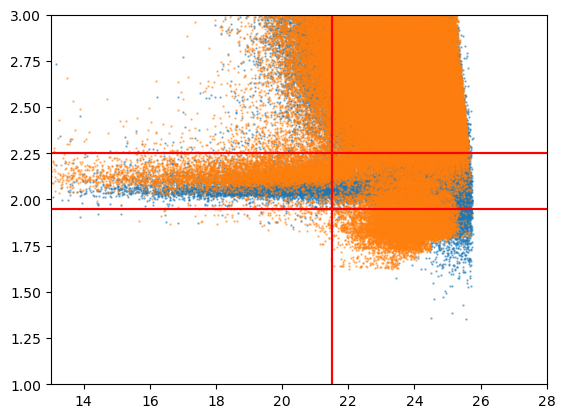

In [50]:
b = 'i'
stars, gals = get_stellar_locust(b, full_cats)
stars_n, gals_n = get_stellar_locust(b, full_cats_force)

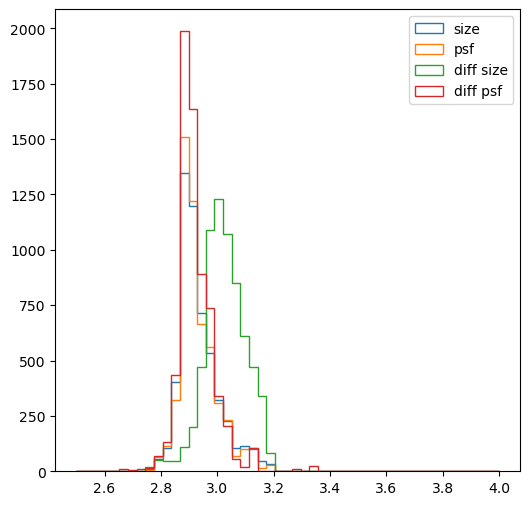

In [42]:
size_bins = np.linspace(2.5,4,50)
star_size = np.sqrt(stars['base_SdssShape_xx'] + stars['base_SdssShape_yy'])
star_psf = np.sqrt(stars['base_SdssShape_psf_xx'] + stars['base_SdssShape_psf_yy'])
star_size_n = np.sqrt(stars_n['base_SdssShape_xx'] + stars_n['base_SdssShape_yy'])
star_psf_n = np.sqrt(stars_n['base_SdssShape_psf_xx'] + stars_n['base_SdssShape_psf_yy'])
fig, ax = plt.subplots(figsize=(6,6))
plt.hist(star_size, size_bins, histtype="step", label="size")
plt.hist(star_psf, size_bins, histtype="step", label="psf")
plt.hist(star_size_n, size_bins, histtype="step", label="diff size")
plt.hist(star_psf_n, size_bins, histtype="step", label="diff psf")
plt.legend()
plt.show()

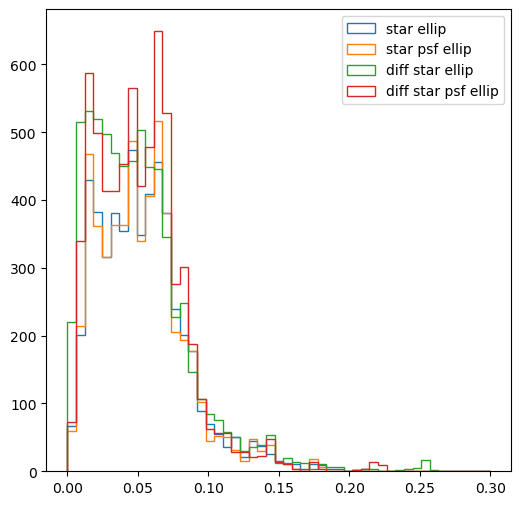

In [43]:
e1 = (stars['base_SdssShape_psf_xx'] - stars['base_SdssShape_psf_yy'])/(stars['base_SdssShape_psf_xx'] + stars['base_SdssShape_psf_yy'])
e2 = 2*(stars['base_SdssShape_psf_xy'])/(stars['base_SdssShape_psf_xx'] + stars['base_SdssShape_psf_yy'])
ellip = np.sqrt((e1)**2 + (e2)**2)

se1 = (stars['base_SdssShape_xx'] - stars['base_SdssShape_yy'])/(stars['base_SdssShape_xx'] + stars['base_SdssShape_yy'])
se2 = 2*(stars['base_SdssShape_xy'])/(stars['base_SdssShape_xx'] + stars['base_SdssShape_yy'])
sellip = np.sqrt((se1)**2 + (se2)**2)

e1 = (stars_n['base_SdssShape_psf_xx'] - stars_n['base_SdssShape_psf_yy'])/(stars_n['base_SdssShape_psf_xx'] + stars_n['base_SdssShape_psf_yy'])
e2 = 2*(stars_n['base_SdssShape_psf_xy'])/(stars_n['base_SdssShape_psf_xx'] + stars_n['base_SdssShape_psf_yy'])
ellip_n = np.sqrt((e1)**2 + (e2)**2)

se1 = (stars_n['base_SdssShape_xx'] - stars_n['base_SdssShape_yy'])/(stars_n['base_SdssShape_xx'] + stars_n['base_SdssShape_yy'])
se2 = 2*(stars_n['base_SdssShape_xy'])/(stars_n['base_SdssShape_xx'] + stars_n['base_SdssShape_yy'])
sellip_n = np.sqrt((se1)**2 + (se2)**2)


ellip_bins = np.linspace(0,0.3,50)
fig, ax = plt.subplots(figsize=(6,6))
plt.hist(sellip, ellip_bins, histtype="step", label="star ellip")
plt.hist(ellip, ellip_bins, histtype="step", label="star psf ellip")
plt.hist(sellip_n, ellip_bins, histtype="step", label="diff star ellip")
plt.hist(ellip_n, ellip_bins, histtype="step", label="diff star psf ellip")
plt.legend()
plt.show()

# approx zero, consistent with kolmogorov profile

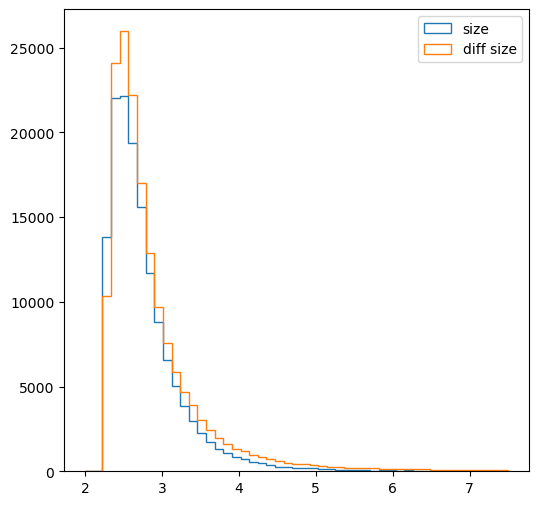

In [44]:
size_bins = np.linspace(2,7.5,50)
# gal_size = np.sqrt(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
gal_size = (gals['base_SdssShape_xx']*gals['base_SdssShape_yy'] - gals['base_SdssShape_xy']**2)**0.25
gal_size_n = (gals_n['base_SdssShape_xx']*gals_n['base_SdssShape_yy'] - gals_n['base_SdssShape_xy']**2)**0.25

fig, ax = plt.subplots(figsize=(6,6))
plt.hist(gal_size, size_bins, histtype="step", label="size")
plt.hist(gal_size_n, size_bins, histtype="step", label="diff size")
plt.legend()
plt.show()

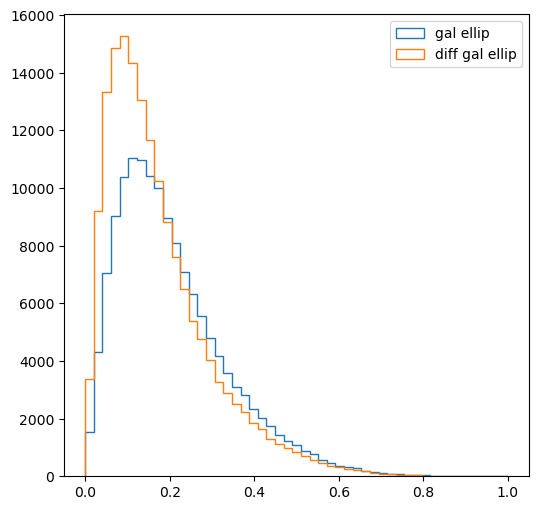

In [45]:
e1 = (gals['base_SdssShape_xx'] - gals['base_SdssShape_yy'])/(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
e2 = 2*(gals['base_SdssShape_xy'])/(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
ellip = np.sqrt((e1)**2 + (e2)**2)

e1 = (gals_n['base_SdssShape_xx'] - gals_n['base_SdssShape_yy'])/(gals_n['base_SdssShape_xx'] + gals_n['base_SdssShape_yy'])
e2 = 2*(gals_n['base_SdssShape_xy'])/(gals_n['base_SdssShape_xx'] + gals_n['base_SdssShape_yy'])
ellip_n = np.sqrt((e1)**2 + (e2)**2)

ellip_bins = np.linspace(0,1,50)
fig, ax = plt.subplots(figsize=(6,6))
plt.hist(ellip, ellip_bins, histtype="step", label="gal ellip")
plt.hist(ellip_n, ellip_bins, histtype="step", label="diff gal ellip")
plt.legend()
plt.show()

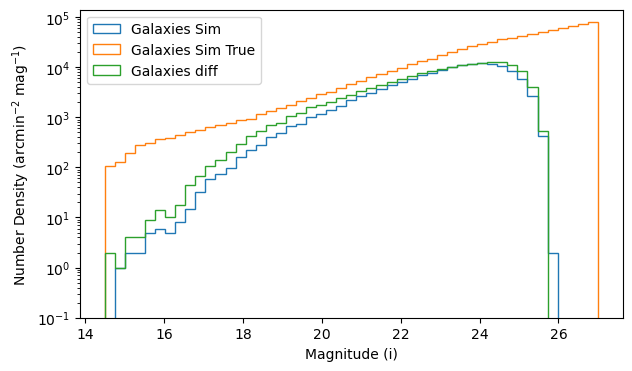

In [48]:
gal_meas = gals[(gals['base_PsfFlux_instFlux']/gals['base_PsfFlux_instFluxErr'] >= 10)]
gal_meas_n = gals_n[(gals_n['base_PsfFlux_instFlux']/gals_n['base_PsfFlux_instFluxErr'] >= 10)]

gal_true = true_cats[b][true_cats[b]['ob_type'] == 'diff_galaxy']

mag_bins = np.linspace(14.5, 27, 50)
bin_size = mag_bins[1] - mag_bins[0]
fig, ax = plt.subplots(1,figsize=(7,4))

cut_sim_mag = -2.5 * np.log10(gal_meas['modelfit_CModel_instFlux']) + 31.4
sim_weight = np.full_like(cut_sim_mag, 1/(area*bin_size))
cut_sim_mag_n = -2.5 * np.log10(gal_meas_n['modelfit_CModel_instFlux']) + 31.4
sim_weight_n = np.full_like(cut_sim_mag_n, 1/(s_area*bin_size))

true_mag = -2.5* np.log10(gal_true['flux']) + 31.4
true_weight = np.full_like(true_mag, 1/(t_area*bin_size))

# ghist_dp1, bins, _ =ax.hist(dp1['mag'], dp1['bins'], weights=dp1['weights'], histtype="step",label="Galaxies ECDFS")
# ghist_sim, bins, _ =ax.hist(cut_sim_mag, mag_bins, weights=sim_weight, histtype="step",label='Galaxies Sim')
# ghist_sim, bins, _ =ax.hist(true_mag, mag_bins, weights=true_weight, histtype="step",label='Galaxies Sim True')
ghist_sim, bins, _ =ax.hist(cut_sim_mag, mag_bins, histtype="step",label='Galaxies Sim')
ghist_sim, bins, _ =ax.hist(true_mag, mag_bins, histtype="step",label='Galaxies Sim True')
ghist_sim, bins, _ =ax.hist(cut_sim_mag_n, mag_bins, histtype="step",label='Galaxies diff')
ax.set_xlabel("Magnitude (i)")
ax.set_ylabel("Number Density (arcmin$^{-2}$ mag$^{-1}$)")
ax.set_yscale('log')
ax.legend()
ax.set_ylim(10e-2)
plt.show()

In [ ]:
# ## bootstrap error
# count = max(full_cats[b]['obs_ind'])
# area = count* (900 * 0.2/60) **2
# outs = {'u':[], 'g':[],'r':[],'i':[],'z':[],'y':[]}
# bins = np.linspace(17.5, 27, 50)
# bin_size = bins[1] - bins[0]
# bands = 'ugrizy'
# # for n in tqdm.tqdm(range(1000)):
# #     for b in bands:
# #         dset = full_cats[b]
# #         l = len(dset)
# #         choice = np.random.choice(np.arange(l),size=l, replace=True)
# #         data = dset['mag'][choice]
# #         digits = np.digitize(data, bins, right=True)
# #         lens = []
# #         for i in range(len(bins) - 1):
# #             bl = sum(digits==i) / 1/(area * bin_size)
# #             lens.append(bl)
# #         outs[b].append(lens)

# norm = area * bin_size
# nbins = len(bins) - 1
# nboot = 1000
# outs = {b: np.empty((nboot, nbins)) for b in bands}
# for b in bands:
#     temp = full_cats[b]
#     temp = temp[(temp['deblend_nChild'] == 0) &
#         (temp['base_SdssShape_flag'] == False) &
#         (temp['modelfit_CModel_instFlux'] >= 0) &
#         (temp['modelfit_CModel_flag'] == False) &
#         (temp['ext_gaap_GaapFlux_1_15x_Optimal_instFlux'] >= 0) &
#         (temp['base_SdssCentroid_flag'] == False) &
#         (temp['ext_gaap_GaapFlux_flag'] == False) &
#         (temp['base_ClassificationSizeExtendedness_flag'] == False)]
#     temp = temp[(temp['base_PsfFlux_instFlux']/temp['base_PsfFlux_instFluxErr'] >= 10)]
#     mags = temp['mag']
#     l = len(mags)
#     for n in tqdm.tqdm(range(nboot), desc=f"{b} band"):
#         data = mags[np.random.randint(0, l, size=l)]
#         hist, _ = np.histogram(data, bins=bins)
#         outs[b][n] = hist / norm


y band: 100%|██████████| 1000/1000 [00:02<00:00, 437.77it/s]


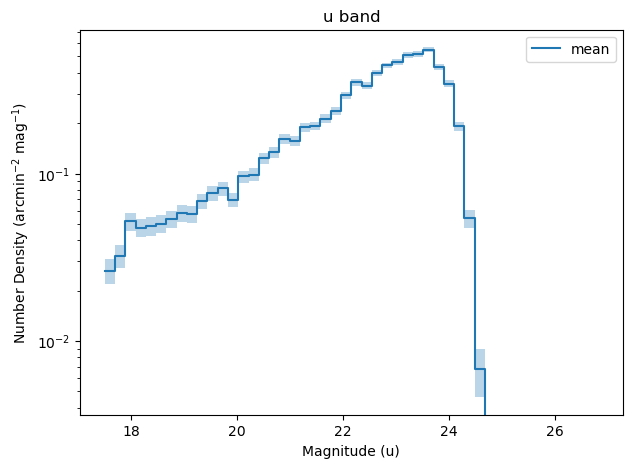

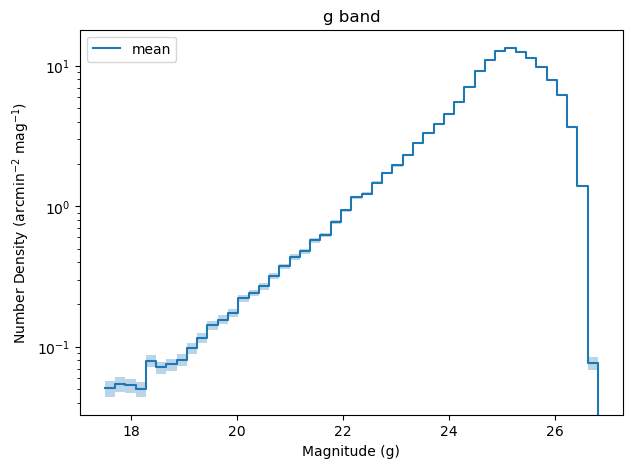

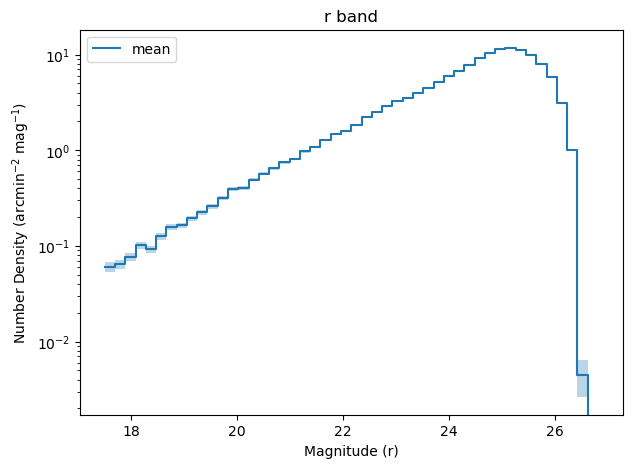

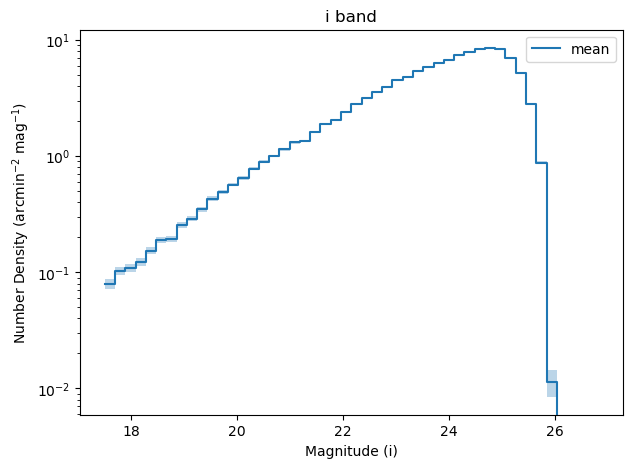

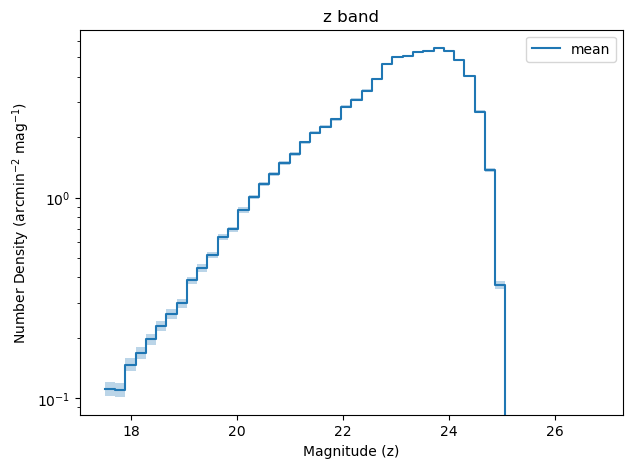

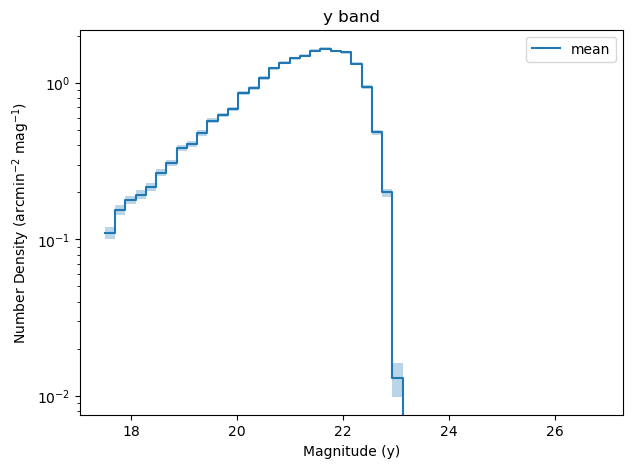

In [ ]:
# bin_centers = 0.5 * (bins[:-1] + bins[1:])
# for i in range(len(bands)):
#     fig, ax = plt.subplots(figsize=(7,5))
#     b = bands[i]
#     outs_arr = np.asarray(outs[b]) 
#     means = outs_arr.mean(axis=0)
#     stds  = outs_arr.std(axis=0)
#     # ax.plot(bin_centers, means, label=b)
#     # ax.fill_between(bin_centers, means - stds, means + stds, alpha=0.2)
#     ax.step(bins[:-1], means, where='post', label='mean')
#     ax.fill_between(
#         bins[:-1],
#         means - stds,
#         means + stds,
#         step='post',
#         alpha=0.3
#     )
#     ax.set_ylabel('Number Density (arcmin$^{-2}$ mag$^{-1}$)')
#     ax.set_xlabel(f"Magnitude ({b})")
#     ax.set_yscale('log')
#     ax.set_title(f'{b} band')
#     ax.legend()

# plt.show()


/tmp/ipykernel_2603344/2250411086.py:33: RuntimeWarning: invalid value encountered in divide
  frac_err = stds / means


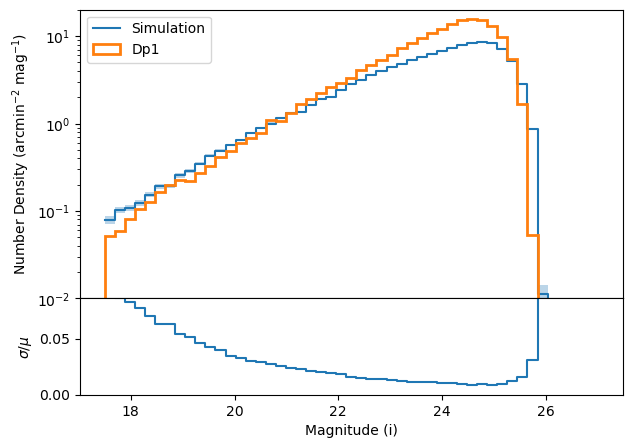

In [ ]:
# bin_centers = 0.5 * (bins[:-1] + bins[1:])
# bin_edges = bins

# outs_arr = np.asarray(outs['i'])   # (n_boot, n_bins)
# means = outs_arr.mean(axis=0)
# stds  = outs_arr.std(axis=0)

# fig = plt.figure(figsize=(7,5))
# gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0)

# ax = fig.add_subplot(gs[0])
# ax_err = fig.add_subplot(gs[1], sharex=ax)

# # --- main histogram ---
# ax.step(bin_edges[:-1], means, where='post', label='Simulation')
# ax.fill_between(
#     bin_edges[:-1],
#     np.clip(means - stds, 1e-20, None),
#     means + stds,
#     step='post',
#     alpha=0.3
# )
# ax.set_yscale('log')
# ax.set_ylabel('Number Density (arcmin$^{-2}$ mag$^{-1}$)')
# ax.set_ylim(10**-2, 20)

# dp1_m = dp1['mag']
# dp1_w = dp1['weights']
# dp1_b = dp1['bins']
# ax.hist(dp1_m, dp1_b,weights=dp1_w,histtype="step",linewidth=2, label="Dp1")

# # --- error panel ---
# frac_err = stds / means

# ax_err.step(
#     bin_edges[:-1],
#     frac_err,
#     where='post'
# )
# ax_err.set_ylabel(r'$\sigma / \mu$')
# ax_err.set_ylim(0, np.nanpercentile(frac_err, 95))

# ax_err.set_xlabel('Magnitude (i)')

# # hide x labels on main plot
# plt.setp(ax.get_xticklabels(), visible=False)
# ax.legend()
# plt.show()

/tmp/ipykernel_2603344/1431951203.py:36: RuntimeWarning: invalid value encountered in divide
  frac_err = stds / means


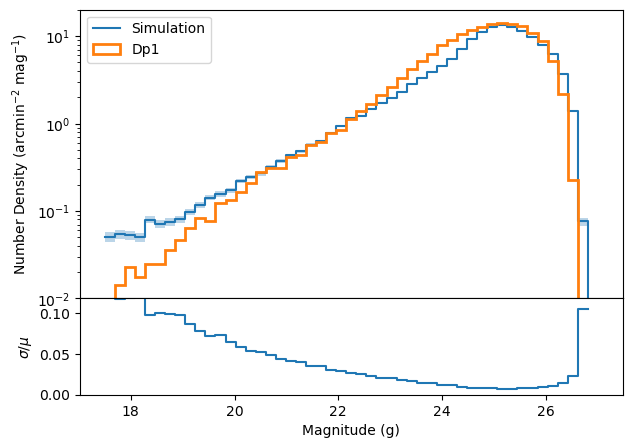

In [ ]:
# with open('/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/dp1_mags_g_full.pickle', 'rb') as f:
#     dp1 = pickle.load(f)

# bin_centers = 0.5 * (bins[:-1] + bins[1:])
# bin_edges = bins

# outs_arr = np.asarray(outs['g'])   # (n_boot, n_bins)
# means = outs_arr.mean(axis=0)
# stds  = outs_arr.std(axis=0)

# fig = plt.figure(figsize=(7,5))
# gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0)

# ax = fig.add_subplot(gs[0])
# ax_err = fig.add_subplot(gs[1], sharex=ax)

# # --- main histogram ---
# ax.step(bin_edges[:-1], means, where='post', label='Simulation')
# ax.fill_between(
#     bin_edges[:-1],
#     np.clip(means - stds, 1e-20, None),
#     means + stds,
#     step='post',
#     alpha=0.3
# )
# ax.set_yscale('log')
# ax.set_ylabel('Number Density (arcmin$^{-2}$ mag$^{-1}$)')
# ax.set_ylim(10**-2, 20)

# dp1_m = dp1['mag']
# dp1_w = dp1['weights']
# dp1_b = dp1['bins']
# ax.hist(dp1_m, dp1_b,weights=dp1_w,histtype="step",linewidth=2, label="Dp1")

# # --- error panel ---
# frac_err = stds / means

# ax_err.step(
#     bin_edges[:-1],
#     frac_err,
#     where='post'
# )
# ax_err.set_ylabel(r'$\sigma / \mu$')
# ax_err.set_ylim(0, np.nanpercentile(frac_err, 95))

# ax_err.set_xlabel('Magnitude (g)')

# # hide x labels on main plot
# plt.setp(ax.get_xticklabels(), visible=False)
# ax.legend()
# plt.show()

In [ ]:
# area = 758* (900 * 0.2/3600) **2
# print(area)

1.8950000000000005
